In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dados da estação A420 - Carira SE. 
## 2012-2022, 11 Anos

## Ajustes dos dados

In [2]:
df = pd.read_csv('INMET_2012_2022/dados_A420_H_2012-01-01_2022-12-31.csv',delimiter=';', skiprows = range (0, 10))
df.columns = ['data','hora','p_atm_estacao','temp_po','temp_max_ant','temp_min_ant','temp_po_max_ant','temp_po_min_ant','ur_max_ant','ur_min_ant','ur_ar_horaria','e']

df.drop('e', axis=1, inplace=True)
#df = df.dropna() # Apaga as linhas com pelo menos um dado faltante
#df = df.interpolate(method="linear") # Caso queira fazer uma interpolação
df.shape

(96432, 11)

In [3]:
df['ano'] = df['data'].str[0:4] # cria a coluna ano com as strings 0, 1, 2 e 3 da coluna data
df['mes'] = df['data'].str[5:7] # cria a coluna mes com as strings 5 e 6 da coluna data
df.head(3)

,data,hora,p_atm_estacao,temp_po,temp_max_ant,temp_min_ant,temp_po_max_ant,temp_po_min_ant,ur_max_ant,ur_min_ant,ur_ar_horaria,ano,mes
0,2012-01-01,0,979.8,19.9,25.1,24.1,19.9,19.3,77.0,70.0,77.0,2012,01
1,2012-01-01,100,979.6,20.3,24.1,23.5,20.3,19.9,82.0,77.0,82.0,2012,01
2,2012-01-01,200,979.3,21.3,23.5,23.1,21.3,20.3,89.0,82.0,89.0,2012,01


In [4]:
meses = {
    '01': 'jan',#eiro',#
    '02': 'fev',#ereiro',
    '03': 'mar',#ço',
    '04': 'abr',#il',
    '05': 'mai',#o',
    '06': 'jun',#ho',
    '07': 'jul',#ho',
    '08': 'ago',#sto',
    '09': 'set',#embro',
    '10': 'out',#ubro',
    '11': 'nov',#embro',
    '12': 'dez',#embro',
} # dicionário chave:valor
df['mes'] = df['mes'].replace(meses) # a coluna mes fica igual à propria coluna mundando 
#seus valores de acordo com o dicionário
df.head(3)

,data,hora,p_atm_estacao,temp_po,temp_max_ant,temp_min_ant,temp_po_max_ant,temp_po_min_ant,ur_max_ant,ur_min_ant,ur_ar_horaria,ano,mes
0,2012-01-01,0,979.8,19.9,25.1,24.1,19.9,19.3,77.0,70.0,77.0,2012,jan
1,2012-01-01,100,979.6,20.3,24.1,23.5,20.3,19.9,82.0,77.0,82.0,2012,jan
2,2012-01-01,200,979.3,21.3,23.5,23.1,21.3,20.3,89.0,82.0,89.0,2012,jan


In [5]:
#dia = [700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800]
#noite = [0,100,200,300,400,500,600,1900,2000,2100,2200,2300]

df['turno'] = df['hora'] # cria a coluna turno com os mesmos dados da coluna hora
turnos = {0:'noite',100:'noite',200:'noite',300:'noite',400:'noite',500:'noite',600:'noite',
          1900:'noite',2000:'noite',2100:'noite',2200:'noite',2300:'noite',
          700:'dia',800:'dia',900:'dia',1000:'dia',1100:'dia',1200:'dia',
          1300:'dia',1400:'dia',1500:'dia',1600:'dia',1700:'dia',1800:'dia'    
} # dicionário chave:valor
df['turno'] = df['turno'].replace(turnos) # a coluna mes fica igual à propria coluna mundando 
#seus valores de acordo com o dicionário
df['temp_med_ant'] = (df['temp_max_ant'] + df['temp_min_ant'])/2 # Cria uma coluna com a media 
#de duas já existente
df.head(3)

,data,hora,p_atm_estacao,temp_po,temp_max_ant,temp_min_ant,temp_po_max_ant,temp_po_min_ant,ur_max_ant,ur_min_ant,ur_ar_horaria,ano,mes,turno,temp_med_ant
0,2012-01-01,0,979.8,19.9,25.1,24.1,19.9,19.3,77.0,70.0,77.0,2012,jan,noite,24.6
1,2012-01-01,100,979.6,20.3,24.1,23.5,20.3,19.9,82.0,77.0,82.0,2012,jan,noite,23.8
2,2012-01-01,200,979.3,21.3,23.5,23.1,21.3,20.3,89.0,82.0,89.0,2012,jan,noite,23.3


In [6]:
df_dia = df.loc[df['turno']=='dia']
df_noite = df.loc[df['turno']=='noite']

In [7]:
print(df.shape, df_dia.shape, df_noite.shape)

(96432, 15) (48216, 15) (48216, 15)


In [8]:
df.loc[(df['ano']=='2016') & (df['mes']=='jan')].to_excel('filtro.xlsx')

## Resumos estatístico - Período 2012 a 2022

### Geral

In [9]:
resumo_geral = df[['p_atm_estacao','temp_po','temp_max_ant','temp_min_ant',
    'temp_po_max_ant','temp_po_min_ant','ur_max_ant',
    'ur_min_ant','ur_ar_horaria']].describe().T # Resumo estatístico
resumo_geral.to_excel('resumo_geral.xlsx', index=True)

### Dia 7:00 às 18:00

In [10]:
resumo_dia = df_dia[['p_atm_estacao','temp_po','temp_max_ant','temp_min_ant',
        'temp_po_max_ant','temp_po_min_ant','ur_max_ant',
        'ur_min_ant','ur_ar_horaria']].describe().T
resumo_dia.to_excel('resumo_dia.xlsx', index=True)

### Noite 19:00 às 6:00

In [11]:
resumo_noite = df_noite[['p_atm_estacao','temp_po','temp_max_ant','temp_min_ant',
          'temp_po_max_ant','temp_po_min_ant','ur_max_ant',
          'ur_min_ant','ur_ar_horaria']].describe().T
resumo_noite.to_excel('resumo_noite.xlsx', index=True)

## Gráficos

### Umidade x Meses

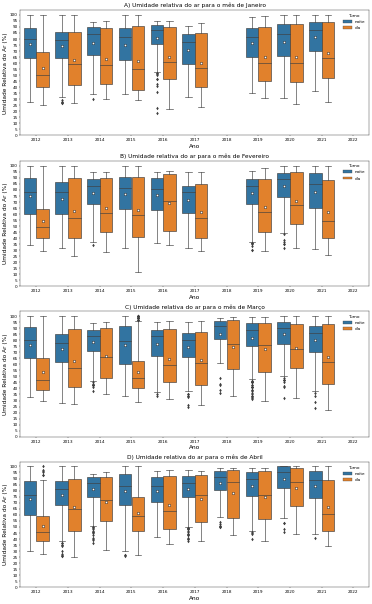

In [12]:
plt.figure(figsize=(15,25),dpi=30)


plt.subplot(4,1,1)
sns.boxplot(y='ur_ar_horaria', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='jan'])
plt.title('A) Umidade relativa do ar para o mês de Janeiro', size=14);
plt.ylabel('Umidade Relativa do Ar (%)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(0, 101, 5))
#############################################################

plt.subplot(4,1,2)
sns.boxplot(y='ur_ar_horaria', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='fev'])
plt.title('B) Umidade relativa do ar para o mês de Fevereiro', size=14);
plt.ylabel('Umidade Relativa do Ar (%)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(0, 101, 5))
#############################################################

plt.subplot(4,1,3)
sns.boxplot(y='ur_ar_horaria', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='mar'])
plt.title('C) Umidade relativa do ar para o mês de Março', size=14);
plt.ylabel('Umidade Relativa do Ar (%)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(0, 101, 5))
#############################################################

plt.subplot(4,1,4)
sns.boxplot(y='ur_ar_horaria', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='abr'])
plt.title('D) Umidade relativa do ar para o mês de Abril', size=14);
plt.ylabel('Umidade Relativa do Ar (%)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(0, 101, 5));
#############################################################

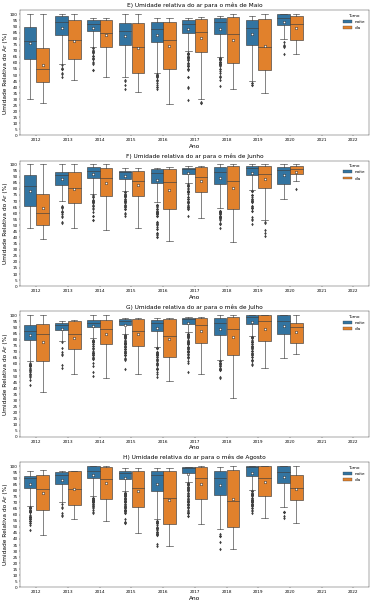

In [13]:
plt.figure(figsize=(15,25),dpi=30)


plt.subplot(4,1,1)
sns.boxplot(y='ur_ar_horaria', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='mai'])
plt.title('E) Umidade relativa do ar para o mês de Maio', size=14);
plt.ylabel('Umidade Relativa do Ar (%)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(0, 101, 5))
#############################################################

plt.subplot(4,1,2)
sns.boxplot(y='ur_ar_horaria', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='jun'])
plt.title('F) Umidade relativa do ar para o mês de Junho', size=14);
plt.ylabel('Umidade Relativa do Ar (%)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(0, 101, 5))
#############################################################

plt.subplot(4,1,3)
sns.boxplot(y='ur_ar_horaria', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='jul'])
plt.title('G) Umidade relativa do ar para o mês de Julho', size=14);
plt.ylabel('Umidade Relativa do Ar (%)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(0, 101, 5))
#############################################################

plt.subplot(4,1,4)
sns.boxplot(y='ur_ar_horaria', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='ago'])
plt.title('H) Umidade relativa do ar para o mês de Agosto', size=14);
plt.ylabel('Umidade Relativa do Ar (%)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(0, 101, 5));
#############################################################

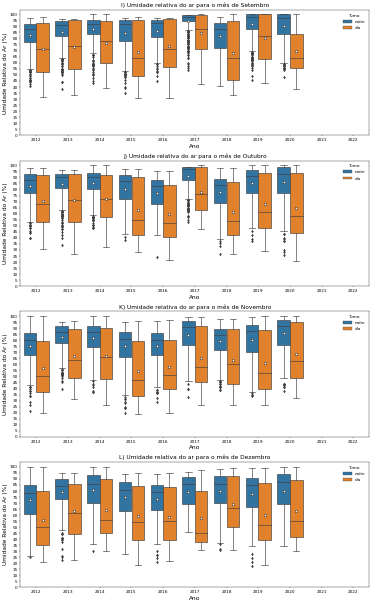

In [14]:
plt.figure(figsize=(15,25),dpi=30)


plt.subplot(4,1,1)
sns.boxplot(y='ur_ar_horaria', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='set'])
plt.title('I) Umidade relativa do ar para o mês de Setembro', size=14);
plt.ylabel('Umidade Relativa do Ar (%)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(0, 101, 5))
#############################################################

plt.subplot(4,1,2)
sns.boxplot(y='ur_ar_horaria', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='out'])
plt.title('J) Umidade relativa do ar para o mês de Outubro', size=14);
plt.ylabel('Umidade Relativa do Ar (%)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(0, 101, 5))
#############################################################

plt.subplot(4,1,3)
sns.boxplot(y='ur_ar_horaria', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='nov'])
plt.title('K) Umidade relativa do ar para o mês de Novembro', size=14);
plt.ylabel('Umidade Relativa do Ar (%)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(0, 101, 5))
#############################################################

plt.subplot(4,1,4)
sns.boxplot(y='ur_ar_horaria', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='dez'])
plt.title('L) Umidade relativa do ar para o mês de Dezembro', size=14);
plt.ylabel('Umidade Relativa do Ar (%)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(0, 101, 5));
#############################################################

### Temperatura x Meses

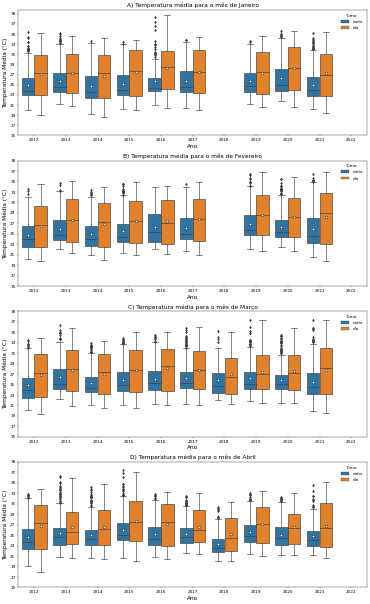

In [15]:
plt.figure(figsize=(15,25),dpi=30)

#########################################################
plt.subplot(4,1,1)
sns.boxplot(y='temp_med_ant', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='jan'])
plt.title('A) Temperatura média para o mês de Janeiro', size=14);
plt.ylabel('Temperatura Média (°C)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(15, 41, 2))
#########################################################
plt.subplot(4,1,2)
sns.boxplot(y='temp_med_ant', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='fev'])
plt.title('B) Temperatura média para o mês de Fevereiro', size=14);
plt.ylabel('Temperatura Média (°C)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(15, 41, 2))
#########################################################
plt.subplot(4,1,3)
sns.boxplot(y='temp_med_ant', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='mar'])
plt.title('C) Temperatura média para o mês de Março', size=14);
plt.ylabel('Temperatura Média (°C)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(15, 41, 2))
#########################################################
plt.subplot(4,1,4)
sns.boxplot(y='temp_med_ant', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='abr'])
plt.title('D) Temperatura média para o mês de Abril', size=14);
plt.ylabel('Temperatura Média (°C)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(15, 41, 2));

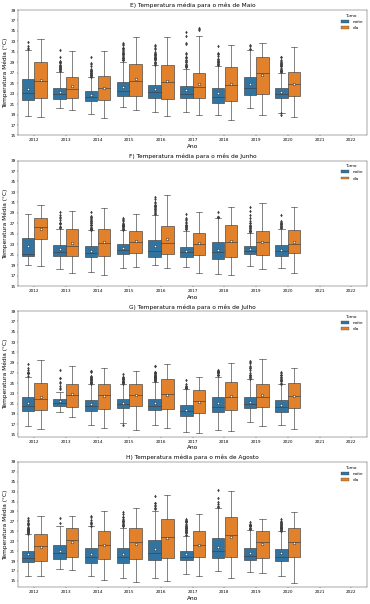

In [16]:
plt.figure(figsize=(15,25),dpi=30)

#########################################################
plt.subplot(4,1,1)
sns.boxplot(y='temp_med_ant', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='mai'])
plt.title('E) Temperatura média para o mês de Maio', size=14);
plt.ylabel('Temperatura Média (°C)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(15, 41, 2))
#########################################################
plt.subplot(4,1,2)
sns.boxplot(y='temp_med_ant', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='jun'])
plt.title('F) Temperatura média para o mês de Junho', size=14);
plt.ylabel('Temperatura Média (°C)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(15, 41, 2))
#########################################################
plt.subplot(4,1,3)
sns.boxplot(y='temp_med_ant', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='jul'])
plt.title('G) Temperatura média para o mês de Julho', size=14);
plt.ylabel('Temperatura Média (°C)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(15, 41, 2))
#########################################################
plt.subplot(4,1,4)
sns.boxplot(y='temp_med_ant', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='ago'])
plt.title('H) Temperatura média para o mês de Agosto', size=14);
plt.ylabel('Temperatura Média (°C)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(15, 41, 2));

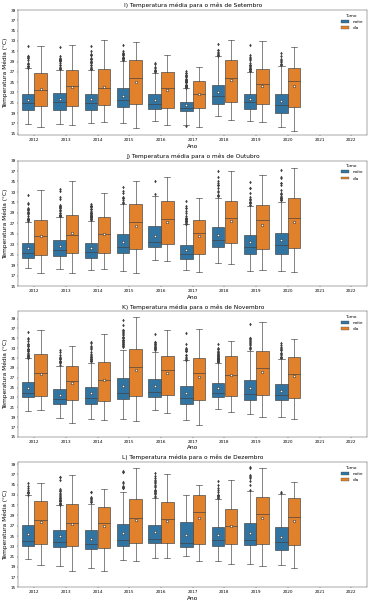

In [17]:
plt.figure(figsize=(15,25),dpi=30)

#########################################################
plt.subplot(4,1,1)
sns.boxplot(y='temp_med_ant', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='set'])
plt.title('I) Temperatura média para o mês de Setembro', size=14);
plt.ylabel('Temperatura Média (°C)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(15, 41, 2))
#########################################################
plt.subplot(4,1,2)
sns.boxplot(y='temp_med_ant', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='out'])
plt.title('J) Temperatura média para o mês de Outubro', size=14);
plt.ylabel('Temperatura Média (°C)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(15, 41, 2))
#########################################################
plt.subplot(4,1,3)
sns.boxplot(y='temp_med_ant', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='nov'])
plt.title('K) Temperatura média para o mês de Novembro', size=14);
plt.ylabel('Temperatura Média (°C)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(15, 41, 2))
#########################################################
plt.subplot(4,1,4)
sns.boxplot(y='temp_med_ant', x='ano',
            hue='turno',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'6'},
            data=df[df['mes']=='dez'])
plt.title('L) Temperatura média para o mês de Dezembro', size=14);
plt.ylabel('Temperatura Média (°C)', size=14)
plt.xlabel('Ano', size=14)
plt.legend(title='Turno',frameon=False)
plt.yticks(np.arange(15, 41, 2));

### Umidade Relativa x Média Mesal 

In [18]:
meses_inv = {
    'jan': 1,#eiro',#
    'fev': 2,#ereiro',
    'mar': 3,#ço',
    'abr': 4,#il',
    'mai': 5,#o',
    'jun': 6,#ho',
    'jul': 7,#ho',
    'ago': 8,#sto',
    'set': 9,#embro',
    'out': 10,#ubro',
    'nov': 11,#embro',
    'dez': 12,#embro',
}

#['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']

media = pd.DataFrame()
media = df.groupby(['mes'])['ur_ar_horaria'].mean()#.unstack() # Média por ano por mês
media_df = media.to_frame()

media_df = media_df.assign(idx=media_df.index)
media_df = media_df.reset_index()#(['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez'])
media_df['idx'] = media_df['idx'].replace(meses_inv)
media_df = media_df.sort_values(by='idx')

media_df

,mes,ur_ar_horaria,idx
4,jan,69.703686,1
3,fev,70.101511,2
8,mar,71.500716,3
0,abr,75.241066,4
7,mai,80.362835,5
6,jun,86.037052,6
5,jul,87.094615,7
1,ago,84.660100,8
11,set,80.824748,9
10,out,75.997583,10


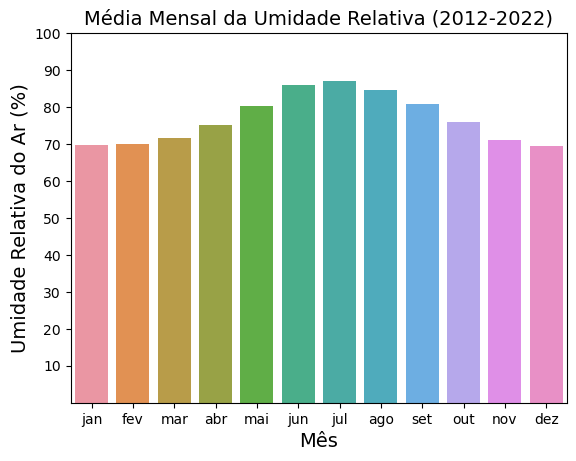

In [19]:
sns.barplot(data=media_df,x='mes',y='ur_ar_horaria')
plt.title('Média Mensal da Umidade Relativa (2012-2022)', size=14);
plt.ylabel('Umidade Relativa do Ar (%)', size=14)
plt.xlabel('Mês', size=14)

plt.yticks(np.arange(10, 101, 10));

In [33]:
turno = pd.DataFrame()
turno = df.groupby(['mes','turno'])['ur_ar_horaria'].mean()#.unstack() # Média por ano por mês
turno_df = turno.to_frame()

turno_df = turno_df.assign(idx=turno_df.index)
turno_df = turno_df.reset_index()#(['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez'])
turno_df['mes_'] = turno_df['mes'].replace(meses_inv)
turno_df = turno_df.sort_values(by='mes_')
turno_df['turno_'] = turno_df['turno'].replace({'dia':1,'noite':2})
#turno_df.head(3)

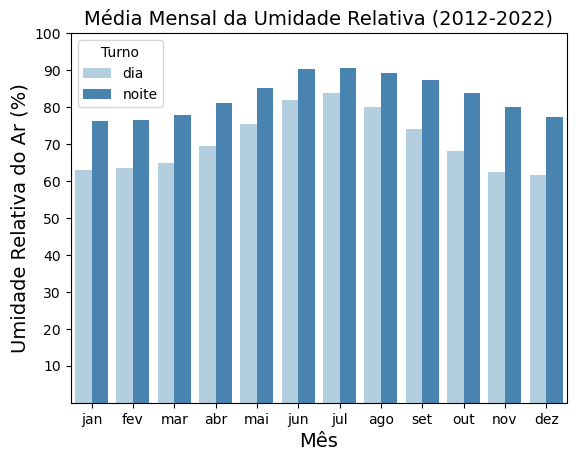

In [21]:


sns.barplot(x='mes',y='ur_ar_horaria',hue='turno',data=turno_df,palette='Blues')

plt.title('Média Mensal da Umidade Relativa (2012-2022)', size=14);
plt.ylabel('Umidade Relativa do Ar (%)', size=14)
plt.xlabel('Mês', size=14)
plt.legend(title='Turno')
sns.color_palette(palette='Greens')
plt.yticks(np.arange(10, 101, 10));

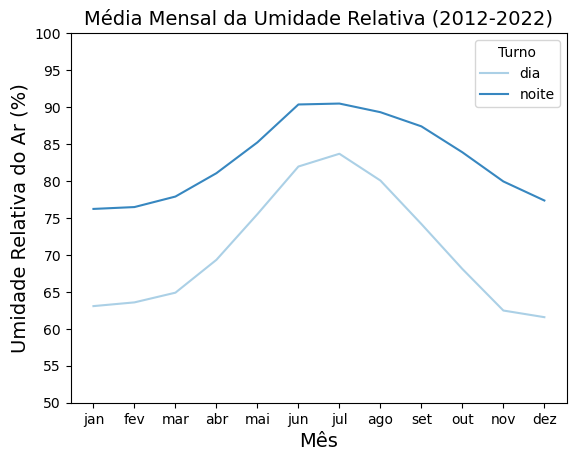

In [22]:
sns.lineplot(x="mes", y="ur_ar_horaria",
             hue="turno",
             data=turno_df,palette='Blues')

plt.title('Média Mensal da Umidade Relativa (2012-2022)', size=14);
plt.ylabel('Umidade Relativa do Ar (%)', size=14)
plt.xlabel('Mês', size=14)
plt.legend(title='Turno')

plt.yticks(np.arange(50, 101, 5));

### Temperatura x Média Mesal 

In [23]:
df.columns

Index(['data', 'hora', 'p_atm_estacao', 'temp_po', 'temp_max_ant',
       'temp_min_ant', 'temp_po_max_ant', 'temp_po_min_ant', 'ur_max_ant',
       'ur_min_ant', 'ur_ar_horaria', 'ano', 'mes', 'turno', 'temp_med_ant'],
      dtype='object')

In [24]:
turno = pd.DataFrame()
turno = df.groupby(['mes','turno'])['temp_med_ant'].mean()#.unstack() # Média por ano por mês
turno_df = turno.to_frame()

turno_df = turno_df.assign(idx=turno_df.index)
turno_df = turno_df.reset_index()#(['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez'])
turno_df['mes_'] = turno_df['mes'].replace(meses_inv)
turno_df = turno_df.sort_values(by='mes_')
turno_df['turno_'] = turno_df['turno'].replace({'dia':1,'noite':2})


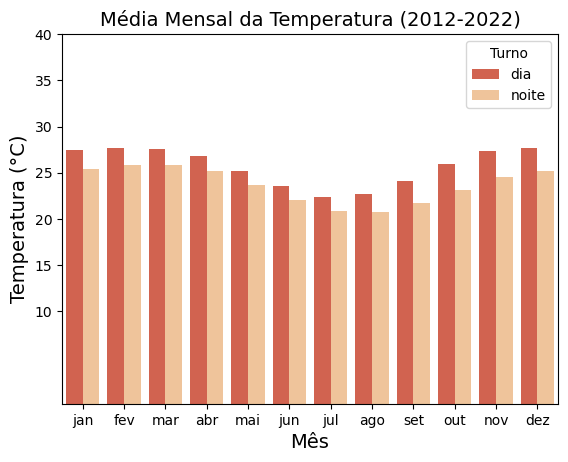

In [25]:
#sns.set_theme()

sns.barplot(x='mes',y='temp_med_ant',hue='turno',data=turno_df,palette='OrRd_r')

plt.title('Média Mensal da Temperatura (2012-2022)', size=14);
plt.ylabel('Temperatura (°C)', size=14)
plt.xlabel('Mês', size=14)
plt.legend(title='Turno')

plt.yticks(np.arange(10, 41, 5));

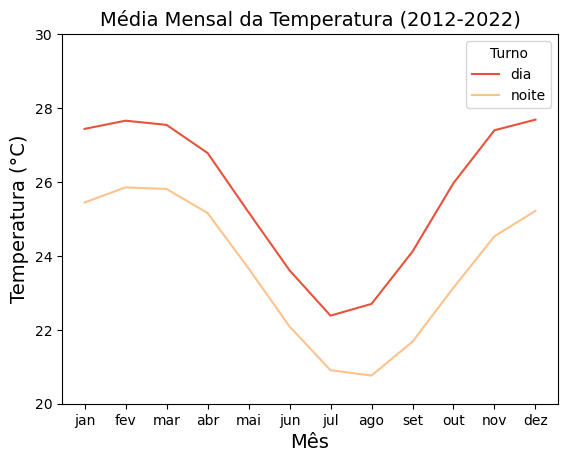

In [26]:
sns.lineplot(x="mes", y="temp_med_ant",
             hue="turno",
             data=turno_df,palette='OrRd_r')

plt.title('Média Mensal da Temperatura (2012-2022)', size=14);
plt.ylabel('Temperatura (°C)', size=14)
plt.xlabel('Mês', size=14)
plt.legend(title='Turno')

plt.yticks(np.arange(20, 31, 2));

In [27]:
turno = pd.DataFrame()
turno = df.groupby(['mes','turno'])['temp_max_ant'].mean()#.unstack() # Média por ano por mês
turno_df = turno.to_frame()

turno_df = turno_df.assign(idx=turno_df.index)
turno_df = turno_df.reset_index()#(['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez'])
turno_df['mes_'] = turno_df['mes'].replace(meses_inv)
turno_df = turno_df.sort_values(by='mes_')
turno_df['turno_'] = turno_df['turno'].replace({'dia':1,'noite':2})


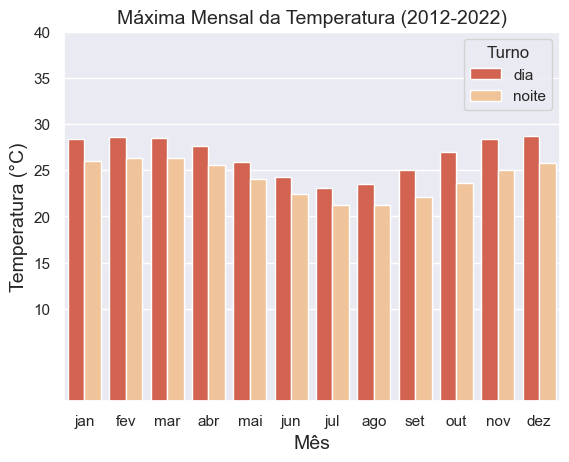

In [28]:
sns.set_theme()

sns.barplot(x='mes',y='temp_max_ant',hue='turno',data=turno_df,palette='OrRd_r')

plt.title('Máxima Mensal da Temperatura (2012-2022)', size=14);
plt.ylabel('Temperatura (°C)', size=14)
plt.xlabel('Mês', size=14)
plt.legend(title='Turno')

plt.yticks(np.arange(10, 41, 5));

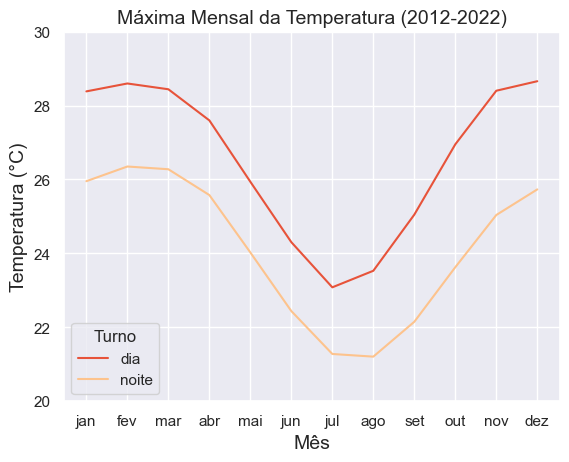

In [29]:
sns.lineplot(x="mes", y="temp_max_ant",
             hue="turno",
             data=turno_df,palette='OrRd_r')

plt.title('Máxima Mensal da Temperatura (2012-2022)', size=14);
plt.ylabel('Temperatura (°C)', size=14)
plt.xlabel('Mês', size=14)
plt.legend(title='Turno')

plt.yticks(np.arange(20, 31, 2));

In [30]:
turno = pd.DataFrame()
turno = df.groupby(['mes','turno'])['temp_min_ant'].mean()#.unstack() # Média por ano por mês
turno_df = turno.to_frame()

turno_df = turno_df.assign(idx=turno_df.index)
turno_df = turno_df.reset_index()#(['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez'])
turno_df['mes_'] = turno_df['mes'].replace(meses_inv)
turno_df = turno_df.sort_values(by='mes_')
turno_df['turno_'] = turno_df['turno'].replace({'dia':1,'noite':2})

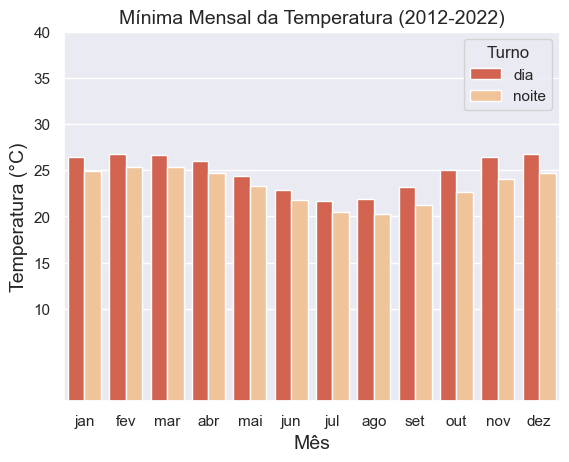

In [31]:
sns.set_theme()

sns.barplot(x='mes',y='temp_min_ant',hue='turno',data=turno_df,palette='OrRd_r')

plt.title('Mínima Mensal da Temperatura (2012-2022)', size=14);
plt.ylabel('Temperatura (°C)', size=14)
plt.xlabel('Mês', size=14)
plt.legend(title='Turno')

plt.yticks(np.arange(10, 41, 5));

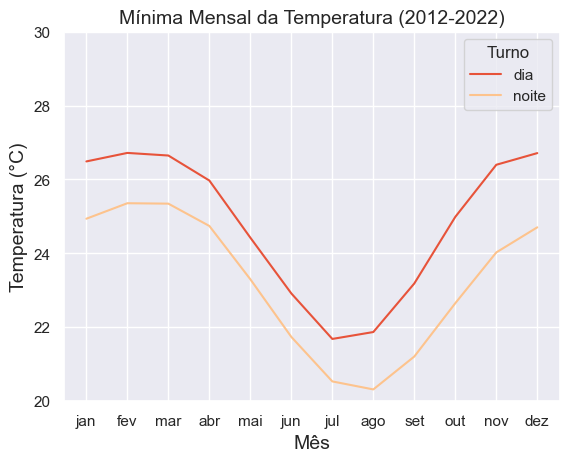

In [32]:
sns.lineplot(x="mes", y="temp_min_ant",
             hue="turno",
             data=turno_df,palette='OrRd_r')

plt.title('Mínima Mensal da Temperatura (2012-2022)', size=14);
plt.ylabel('Temperatura (°C)', size=14)
plt.xlabel('Mês', size=14)
plt.legend(title='Turno')

plt.yticks(np.arange(20, 31, 2));

### Correlação Umidade Relativa x Temperatura 

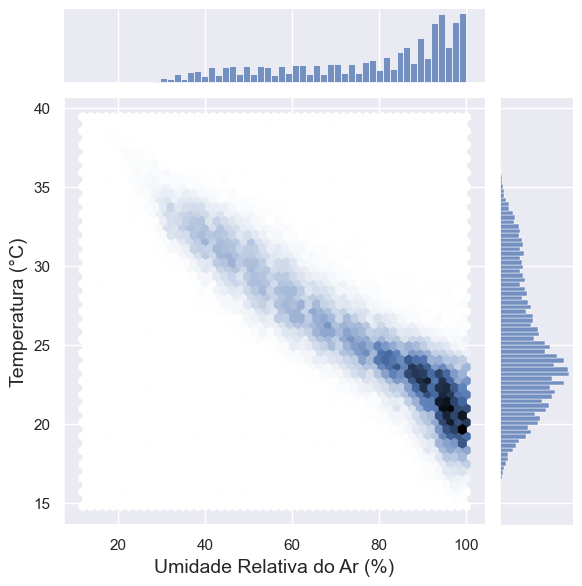

In [69]:
sns.jointplot(y='temp_med_ant',
              x='ur_ar_horaria',
              #hue_order='turno',
              data=df,
              kind='hex',
              dropna=True)
#plt.title('Correlação da Umidade Relativa e Temperatura (2012-2022)', size=14);
plt.ylabel('Temperatura (°C)', size=14)
plt.xlabel('Umidade Relativa do Ar (%)', size=14);

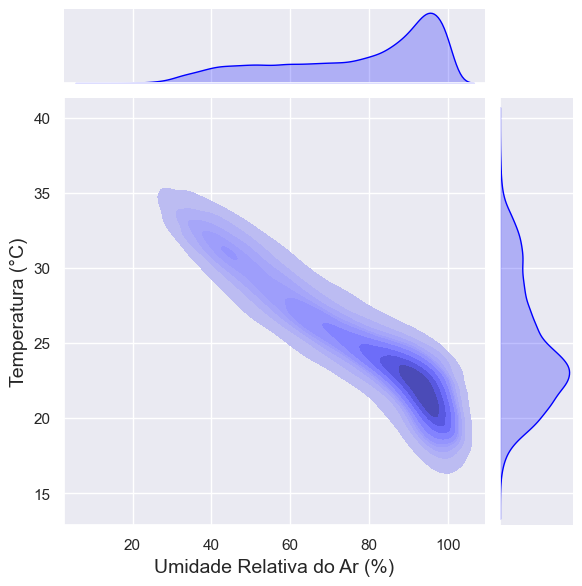

In [61]:
sns.jointplot(y='temp_med_ant',
              x='ur_ar_horaria',
              data=df,
              kind='kde',
              color='Blue',
              fill=True)
plt.ylabel('Temperatura (°C)', size=14)
plt.xlabel('Umidade Relativa do Ar (%)', size=14);